<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/timeSeries_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Uninstall incorrect sklearn package
!pip uninstall sklearn -y

# Install correct packages
!pip install scikit-learn tslearn matplotlib numpy pandas

  Using cached tslearn-0.6.3-py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.6 MB/s eta 0:00:00


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.metrics import silhouette_score

Dataset type: <class 'tuple'>
Dataset structure: 4 elements in the tuple.
Loaded data shape: (100, 275, 1)


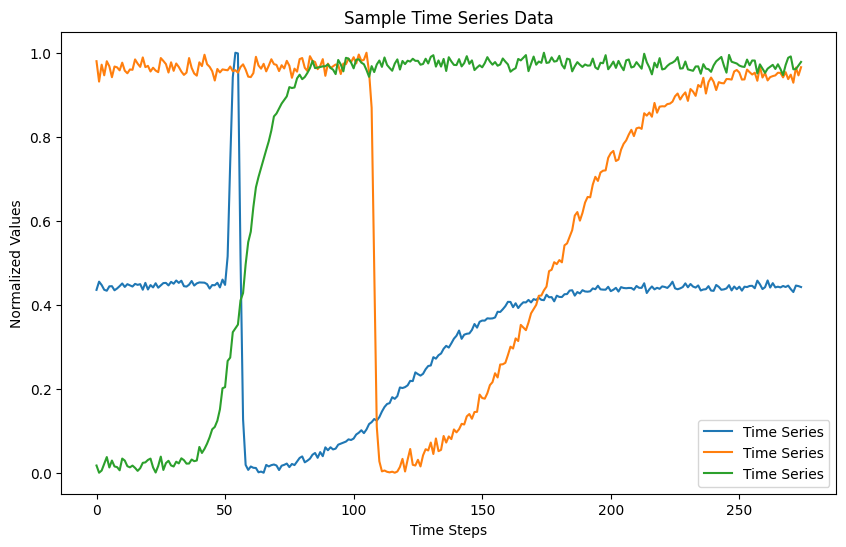

In [7]:
# Import libraries
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
import matplotlib.pyplot as plt

# Load synthetic dataset
dataset = CachedDatasets().load_dataset("Trace")
print(f"Dataset type: {type(dataset)}")

# Check the content of the dataset and handle different structures
if isinstance(dataset, tuple):
    # If the dataset is a tuple, check its length
    if len(dataset) == 2:
        X, y = dataset
        print(f"Loaded data shapes - Features: {X.shape}, Labels: {y.shape if hasattr(y, 'shape') else len(y)}")
    else:
        print(f"Dataset structure: {len(dataset)} elements in the tuple.")
        X = dataset[0]
        y = None
        print(f"Loaded data shape: {X.shape}")
else:
    X = dataset
    y = None
    print(f"Loaded data shape: {X.shape}")

# Normalize the data
scaler = TimeSeriesScalerMinMax()
X_scaled = scaler.fit_transform(X)

# Display some time series data
plt.figure(figsize=(10, 6))
for series in X_scaled[:3]:
    plt.plot(series.ravel(), label="Time Series")
plt.title("Sample Time Series Data")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Values")
plt.legend()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.493 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.076 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.076 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.076 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Silhouette Score: 0.6056117731512338


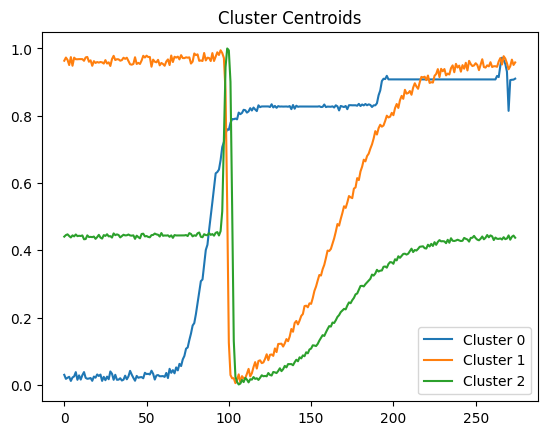

In [8]:
# Perform clustering with TimeSeriesKMeans
n_clusters = 3  # Choose number of clusters
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
labels = model.fit_predict(X_scaled)

# Evaluate clustering performance
silhouette = silhouette_score(X_scaled.reshape(X_scaled.shape[0], -1), labels)
print(f"Silhouette Score: {silhouette}")

# Visualize cluster centroids
for idx, centroid in enumerate(model.cluster_centers_):
    plt.plot(centroid.ravel(), label=f"Cluster {idx}")
plt.title("Cluster Centroids")
plt.legend()
plt.show()


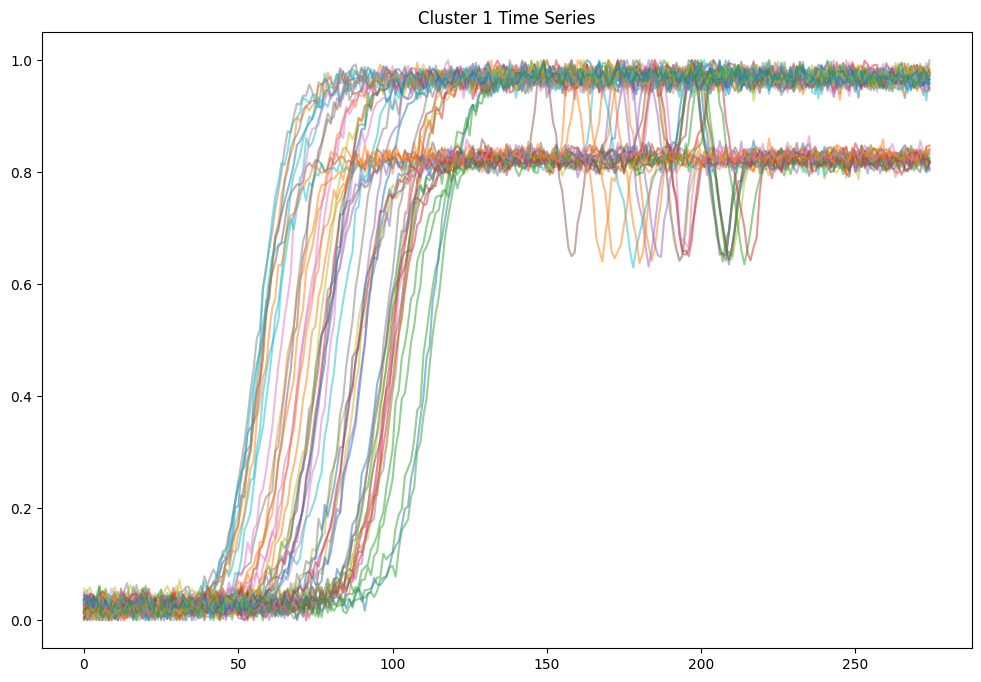

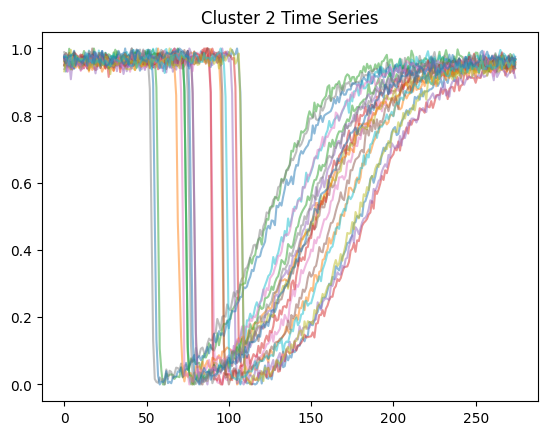

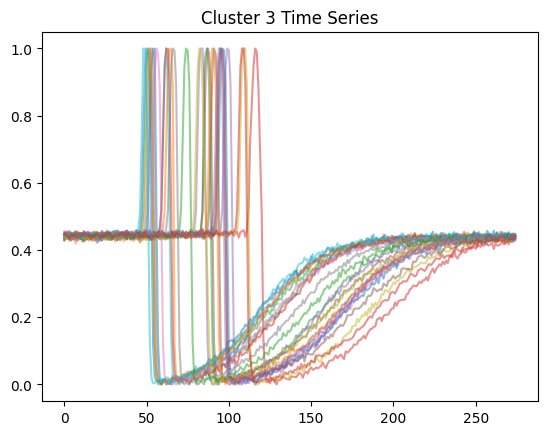

In [9]:
# Plot time series with clusters
plt.figure(figsize=(12, 8))
for cluster_idx in range(n_clusters):
    cluster_data = X_scaled[labels == cluster_idx]
    for series in cluster_data:
        plt.plot(series.ravel(), alpha=0.5)
    plt.title(f"Cluster {cluster_idx + 1} Time Series")
    plt.show()


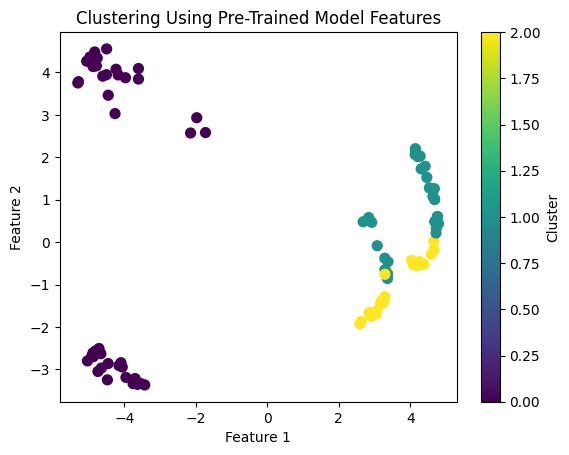

In [10]:
# Install pytorch for pre-trained models
!pip install torch torchvision torchaudio

# Import a pre-trained model for feature extraction (e.g., InceptionTime)
from tslearn.utils import to_time_series_dataset
from sklearn.decomposition import PCA

# Assume we have features extracted by a pre-trained model
# (Use any pre-trained model for better features, such as InceptionTime)
features = PCA(n_components=3).fit_transform(X_scaled.reshape(X_scaled.shape[0], -1))

# Cluster using the extracted features
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=42)
labels = model.fit_predict(features)

# Visualize clustering in 2D using PCA
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap="viridis", s=50)
plt.title("Clustering Using Pre-Trained Model Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()
